# Linear and Polynomial Regressions (practice)

**Author**: [Gilyoung Cheong](https://www.linkedin.com/in/gycheong/)

We use the [dataset about Walmart sales from Kaggle by mikhail1681](https://www.kaggle.com/datasets/mikhail1681/walmart-sales?select=Walmart_sales.csv) to implement linear regression and polynomial regression models in practice. We will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for manipulating dataframes.
*   [`numpy`](https://numpy.org/) for various mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for applying machine learning algorithms.
*   [`seaborn`](https://seaborn.pydata.org/) for data visualization.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting.

In [210]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
import seaborn as sns # apparently named after Samuel Norman Seaborn: https://stackoverflow.com/questions/41499857/why-import-seaborn-as-sns
import matplotlib.pyplot as plt

In [211]:
# Sample description of the data

url = "https://raw.githubusercontent.com/gycheong/machine_learning/main/Walmart_sales.csv"
df = pd.read_csv(url)
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6249,44,06-01-2012,325327.93,0,33.80,3.080,130.157516,5.774
2756,20,05-11-2010,2184316.64,0,42.78,2.917,205.160837,7.484
1780,13,29-04-2011,1895583.12,0,43.85,3.683,128.999867,7.193
5224,37,22-07-2011,505543.53,0,83.31,3.651,214.171342,8.177
5762,41,26-11-2010,1866681.57,1,25.30,2.742,191.012180,7.508


In [212]:
# Data types

df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

From above, we see that our dataframe (i.e., the object df) has the following parameters. Descriptions are from [mikhail1681, the owner of the data](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data).

| Parameter | Description | Content type |
|---|----|---|
| Store | Store number | integer |
| Date | Sales week start date | integer |
| Weekly_Sales | Sales | float |
| Holiday_Flag | Mark on the presence or absence of a holiday | integer (0 or 1) |
| Temperature | Air temperature in the region | float |
| Fuel_Price | Fuel cost in the region (USD) | float | 
| CPI | Consumer price index | float |
| Unemployment | Unemployment rate | float |

## Setting the goal

We want to construct a linear regression model and polynomial regression models (of several degrees) whose 
* input data are "Store", "Temperature", "Fuel_Price", "CPI", and "Unemployment" 
* and output data is "Weekly_Sales".

In [213]:
# We check if there are any NaN (not a number) values

print(df.isna().sum()) 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## Scatter Plots

Let's make brief scatter plots to see how each input feature may be related to the output feature.

(0.0, 3999121.46)

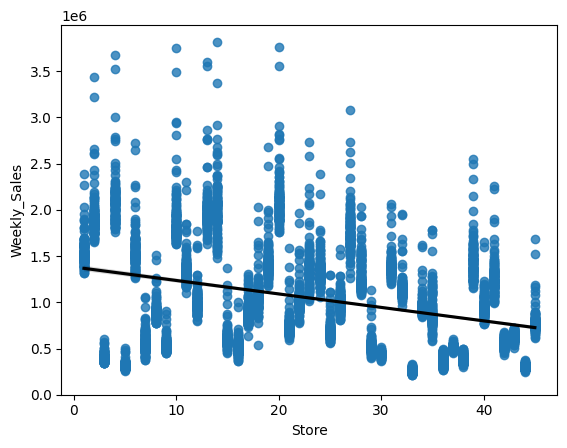

In [214]:
sns.regplot(x = "Store", y = "Weekly_Sales", data = df, line_kws = {"color" : "black"})
plt.ylim(0,)

(0.0, 3999121.46)

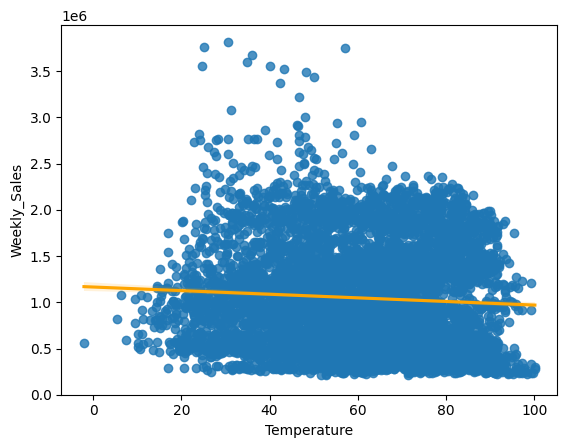

In [215]:
sns.regplot(x = "Temperature", y = "Weekly_Sales", data = df, line_kws = {"color" : "orange"})
plt.ylim(0,)

(0.0, 3999121.46)

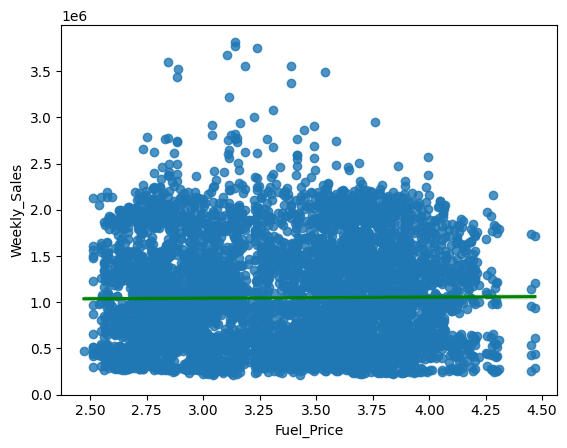

In [216]:
sns.regplot(x = "Fuel_Price", y = "Weekly_Sales", data = df, line_kws = {"color" : "green"})
plt.ylim(0,)

(0.0, 3999121.46)

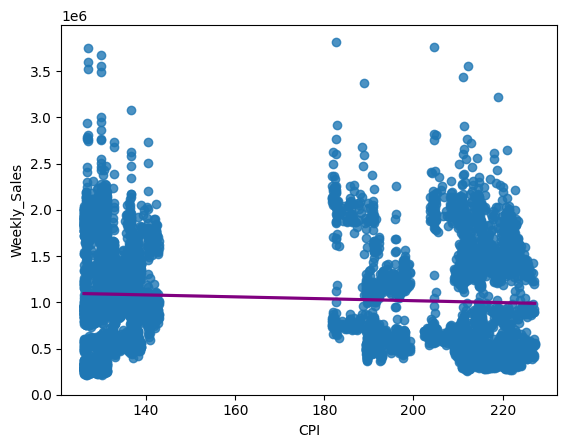

In [217]:
sns.regplot(x = "CPI", y = "Weekly_Sales", data = df, line_kws = {"color" : "purple"})
plt.ylim(0,)

(0.0, 3999121.46)

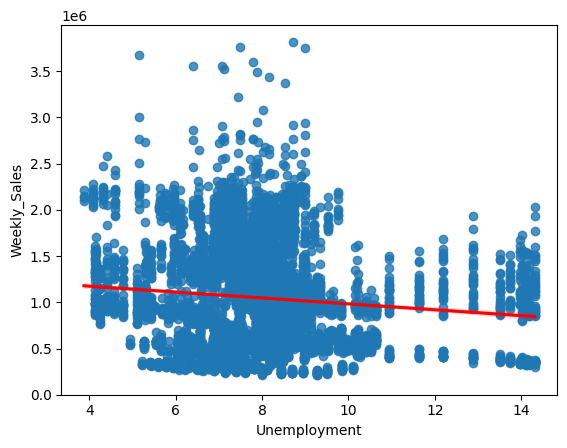

In [218]:
sns.regplot(x = "Unemployment", y = "Weekly_Sales", data = df, line_kws = {"color" : "red"})
plt.ylim(0,)


## Building Linear Regression Model

In [219]:
x_data = df[["Store", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_data = df[["Weekly_Sales"]]

In [227]:
x, x_unbiased, y, y_unbiased = train_test_split(x_data, y_data, test_size=0.2, random_state=2)

# separating 20% of the unbiased data for the final test

In [238]:
# 5-fold cross validation on x, y (80% of the total given data)

kfold = KFold(n_splits=5, shuffle=True, random_state=12)
x_train = []
y_train = []
x_test = []
y_test = []
lr = []


for i, (train_index, test_index) in enumerate(kfold.split(x,y)):
    lr.append(LinearRegression())

    x_train.append(x.iloc[train_index])
    y_train.append(y.iloc[train_index])

    x_test.append(x.iloc[test_index])
    y_test.append(y.iloc[test_index])

    lr[i].fit(x_train[i], y_train[i])

### $R^2$ score (coefficient of determination)

A common measure to test whether output $\boldsymbol{\hat{y}} = (\hat{y}_1, \dots, \hat{y}_n)$ from the suggested model works well is to use the **$R^2$ score** (or the **coefficent of determiantion**) $\boldsymbol{y}$ against $\boldsymbol{\hat{y}}$, defined as follows:
$$R^2(\boldsymbol{y}, \boldsymbol{\hat{y}}) := 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{\boldsymbol{y}})^2}.$$

**Remark**. For now, we just note that the closer the $R^2$ score is to $1$ (on the test dataset), the better our model is. We also note that reversing the order of $\boldsymbol{y}$ and $\boldsymbol{\hat{y}}$ generally leads to a different quantity.

In [239]:
yhat = []

for i in range(len(lr)):
    yhat.append(lr[i].predict(x_test[i])) 
    print("The value of R^2 (using .score):", lr[i].score(x_test[i], y_test[i]))
    print("The value of R^2 (using r2_score):", r2_score(y_test[i], yhat[i]), "\n")

# given by plugging in our test value into the 5 linear models we developed above
# The computed R^2 scores indicate that maybe it is not the best to use the linear regression

The value of R^2 (using .score): 0.1523728320570904
The value of R^2 (using r2_score): 0.1523728320570904 

The value of R^2 (using .score): 0.15779024286311982
The value of R^2 (using r2_score): 0.15779024286311982 

The value of R^2 (using .score): 0.15072915083769645
The value of R^2 (using r2_score): 0.15072915083769645 

The value of R^2 (using .score): 0.11284986220349813
The value of R^2 (using r2_score): 0.11284986220349813 

The value of R^2 (using .score): 0.1395893452096495
The value of R^2 (using r2_score): 0.1395893452096495 



## Building Polynomial Regression Models

We now start building polynomial regression models. We shall note that the case where degree is 1 should give the same result as the linear regression we tried above.

In [240]:
poly = []
pr = []

x_train_pr = []
x_test_pr = []

yhat_pr = []

for d in range(11): # d is the (max) degree for polynomial feature
    poly.append(PolynomialFeatures(degree=d))
    pr.append(LinearRegression())
    x_train_pr.append([])
    x_test_pr.append([])
    
    yhat_pr.append([])

    for i in range(len(x_train)):
        x_train_pr[d].append(poly[d].fit_transform(x_train[i]))
        x_test_pr[d].append(poly[d].fit_transform(x_test[i]))
        # Note that we do not need a "degree d version" of y_train nor y_test

        pr[d].fit(x_train_pr[d][i], y_train[i])
        yhat_pr[d].append(pr[d].predict(x_test_pr[d][i]))

# x_train_pr[d] has 5 degree d x_train data which are x_train_pr[d][0], ..., x_train_pr[d][4]        
# yhat_pr[d] has 5 degree d prediction data which are yhat_pr[d][0], ..., yhat_pr[d][4]

In [241]:
for d in range(11):
    print("Degree ", d)    
    sum = 0
    
    for i in range(len(x_train)):
        c = r2_score(y_test[i], yhat_pr[d][i])
        sum += c
        print("The value of R^2:", c)

    print("Average R^2:", sum / len(x_train))
    print()


Degree  0
The value of R^2: -0.00028714383655192854
The value of R^2: -3.294814043020011e-05
The value of R^2: -0.0004972749945919563
The value of R^2: -0.0012922798297856364
The value of R^2: -0.0019486648634456927
Average R^2: -0.0008116623329610829

Degree  1
The value of R^2: 0.15237283205709018
The value of R^2: 0.1577902428631197
The value of R^2: 0.15072915083769634
The value of R^2: 0.11284986220349802
The value of R^2: 0.1395893452096495
Average R^2: 0.14266628663421074

Degree  2
The value of R^2: 0.28539797910169606
The value of R^2: 0.27446306128706943
The value of R^2: 0.282109138298158
The value of R^2: 0.22664796515718988
The value of R^2: 0.2385353551779964
Average R^2: 0.26143069980442196

Degree  3
The value of R^2: 0.38658753967168924
The value of R^2: 0.3595333425157917
The value of R^2: 0.38124361495145065
The value of R^2: 0.3521802068146286
The value of R^2: 0.3539484886460562
Average R^2: 0.36669863851992324

Degree  4
The value of R^2: 0.5442892242372569
The va

## Choosing a model and giving it a final test

Based on the above R2-scores, we choose the degree 8 polynomial regression model. Using the unbiased data separated before we tried the 5-fold split, we test the model one more time:

In [253]:
yhat_unbiased = pr[8].predict(poly[8].fit_transform(x_unbiased))

print("The R^2 of the chosen:", r2_score(y_unbiased, yhat_unbiased))

The R^2 of the chosen: 0.6913247516740328
